<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Johannah, my name is Dmitrii. Nice to meet you! 🙌 I'm going to review your project!

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
- Overall well done!  I can see that a lot of effort has been made! Your project already looks really good and you accomplished impressive results.
- It is great that you can use different methods for data processing, write functions and apply all of that on real data and project tasks, keep it up!
   
- Nevertheless, there is one area for improvement (in red) that will help you to make your project even better: 
    - Check the filling method for missing data and whether other vehicle characteristics can be used to fill them.
    
I will wait for you to send me a new version of the project with changes :) 
 
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.
    
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- Hi Johannah! Thank you for making corrections and improvements in your project.
- Now no critial issues left, so your project has been accepted! 

Please keep up the great work and good luck on the next project! 
</div>

# What sells a car?

Hundreds of free advertisements for vehicles are published on the Crankshaft site every day. My purpose is to study these data collected over the last few years and determine which factors influence the price of a vehicle.
## Analysis outline
I plan to process and enrich the data to prepare it for my analysis. Then I will use exploratory data analysis techniques utilizing pandas, numpy and then use data visualization utilizing seaborn and matplotlib to aid me in making conclusions for which factors have the greatest impact on the price of vehicles

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
- It would be great to add additional information about project tasks. It gives an overview of what you are going to achieve in this project.
- Also, this introduction potentially can be used as a Readme file in your portfolio on Github. One example of a nice introduction for a data analysis project can be found here: [https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md](https://github.com/CICIFLY/Data-Analytics-Projects/blob/master/AB%20Testing%20Result%20Analyze/readme.md)
    
</div>

## Initialization

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
df = pd.read_csv('/datasets/vehicles_us.csv')


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

Lets get to know the data. Ill get some summary data first.

In [3]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


 I see that a few columns imported as the float type. This is unnecessary as they are all integers. I will convert these data types where possible. 

Below I see that we have many NaN values. Looking at the data for 'is_4wd' I believe that I should convert NaN to 0 for the cars which are not 4wd. The rest of the Nan values I will have to look into further.

In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]

price           0.000000
model_year      0.070238
model           0.000000
condition       0.000000
cylinders       0.102086
fuel            0.000000
odometer        0.153168
transmission    0.000000
type            0.000000
paint_color     0.179854
is_4wd          0.503697
date_posted     0.000000
days_listed     0.000000
dtype: float64

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
It is indeed always helpful to calculate the percentage of missing values. It helps to understand the overall impact of possible filling strategies.

</div>

In [8]:
df.duplicated().sum()

0

### Conclusions and further steps

There are a number of missing values in the columns 'model_year' at 6%, 'cylinders' at 10%, 'odometer' at 15%, 'paint_color' at 17% and 'is_4wd' at 50%. I will replace the NaN as stated before in 'is_4wd'. I will investigate the other missing values and make a decision on whether changing them would be necessary. There are no duplicated rows.


I am adding an id column to help me with my analysis, there is not an existing column to uniquely identify each entry. I will use this column later on.  

In [9]:
df['id']=df.index
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,3
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,4
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,6
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,8
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Good conclusion and great that all imports and data load are grouped in different cells before the project.
   
    
</div>

## Treat missing values (if any)

I will go by column to determine what to do about the missing values in each column. 

In [10]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,id
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000,51525.000000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476,25762.000000
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427,14874.130647
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000,0.000000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000,12881.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000,25762.000000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000,38643.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000,51524.000000


In [11]:
df['is_4wd'].value_counts().sort_values(ascending=False)

1.0    25572
Name: is_4wd, dtype: int64

In [12]:
df['is_4wd'].isna().sum()

25953

In [13]:
len(df['is_4wd'])

51525

In [14]:
df['is_4wd']=df['is_4wd'].fillna(0)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

You have done great work with missing values.    

**`is_4wd`**
    
Indeed, `is_4wd` contains a boolean type of information (yes/no). So filling missing data with 0 will allow us to keep a potentially useful feature.
    

In [15]:
df['is_4wd'].value_counts().sort_values(ascending=False)

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

I replaced the NaN values in 'is_4wd' with zero to indicate they are not 4wd

In [16]:
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

I will fill the missing values with the median cylinders for each model in the data 

In [17]:
df = df.assign(cylinders=df['cylinders'].combine_first(df[['model','cylinders']].groupby('model').transform('median').squeeze()))#df.assign(cylinders=df['cylinders'].combine_first(df[['model','cylinders']].groupby('model').transform('median').squeeze()))


In [18]:
df['cylinders'].isna().sum()

0

In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  id            51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


the same goes for cylinders and odometer

In [20]:
df['paint_color'].value_counts().sort_values(ascending=False)

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [21]:
df['paint_color']=df['paint_color'].fillna('unknown')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>


**`paint_color`**   
That is also correct to fill it with others, as it is not possible to fill this value based on other car features.  
    
</div>

In [22]:
df['paint_color'].value_counts().sort_values()

purple       102
orange       231
yellow       255
custom      1153
brown       1223
green       1396
red         4421
blue        4475
grey        5037
silver      6244
black       7692
unknown     9267
white      10029
Name: paint_color, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  id            51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


In [24]:
df['model_year'].isna().sum()

3619

In [25]:
df['model_year'].value_counts().sort_values(ascending=False)

2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

I will replace the missing model year values with the median model_year for the model 

In [26]:
df=df.assign(model_year=df['model_year'].combine_first(df[['model','model_year']].groupby('model').transform('median').squeeze()))

In [27]:
df=df.assign(odometer=df['odometer'].combine_first(df[['condition','odometer']].groupby('condition').transform('median').squeeze()))


In [28]:
df.isna().sum()


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
id              0
dtype: int64

No more Nan :)

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>


Great! Thank you for updating that. 

In [29]:
df.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19,0
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,0.0,2019-03-22,9,3
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,4
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,5
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,6
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68,7
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19,8
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,9


In [30]:
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed,id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000
mean,12132.464920,2009.793954,6.121067,115199.014508,0.496303,39.55476,25762.000000
std,10040.803015,6.099296,1.657457,60484.863376,0.499991,28.20427,14874.130647
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.00000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,0.000000,19.00000,12881.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,0.000000,33.00000,25762.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,1.000000,53.00000,38643.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.00000,51524.000000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  id            51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


I have delt with the NaN values!

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
 

We still have some missing values in the odometer,  model_year, cylinders. 
    
In most cases, it is more beneficial to try to restore missing data. In this case it can be helpful to check additionally the relationship between feature with missing values and other vehicle characteristics.
    
You can check this data, for example, with the following code:

    cylinders_model = v.groupby('model').agg({'cylinders': ('mean','median')})
Can you please check whether grouped value can be used here and share your thoughts?

## Fix data types

As the data are more or less complete now, I will fix the data types if possible (I cannot change the data type for columns with missing values). I will change the float types of columns without NaN values to integers

In [32]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  id            51525 non-null  int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 5.5+ MB


In [33]:
df['is_4wd']=df['is_4wd'].astype('bool')

In [34]:
df['model_year']=df['model_year'].astype('int')

In [35]:
df['cylinders']=df['cylinders'].astype('int')

In [36]:
df['odometer']=df['odometer'].astype('int')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51525 non-null  int64 
 1   model_year    51525 non-null  int64 
 2   model         51525 non-null  object
 3   condition     51525 non-null  object
 4   cylinders     51525 non-null  int64 
 5   fuel          51525 non-null  object
 6   odometer      51525 non-null  int64 
 7   transmission  51525 non-null  object
 8   type          51525 non-null  object
 9   paint_color   51525 non-null  object
 10  is_4wd        51525 non-null  bool  
 11  date_posted   51525 non-null  object
 12  days_listed   51525 non-null  int64 
 13  id            51525 non-null  int64 
dtypes: bool(1), int64(6), object(7)
memory usage: 5.2+ MB


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>

Well done that you have checked the data types. However, I would suggest minor changes:
- Here boolean type seems more appropriate for the column `is_4wd`.
- Also you can change data types for the following columns: model_year, cylinders, odometer.

</div>

<div class="alert alert-info"> I was able to change the data type 'is_4wd' to the boolean type, however when I processed the IQR for the outliers it caused an error. Please let me know what you think about this. Thanks!</div>    


<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

Unfortunately, this will not work for the whole dataframe (like in your code below) as 'is_4wd' (with a bool type) contains logical values 0/1.

One way to avoid this error to check outliers in specific columns:
    
    Q1_ = df['odometer'].quantile(.25)
    ...
</div>

## Enrich data

Adding additional factors to the data will make the analysis easier. I will start by changing the 'date_posted' column to date-time format.

In [38]:
df['date_posted']=pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  id            51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(6), object(6)
memory usage: 5.2+ MB


Now that I have my datetime set up I will add a column for the age of the vehicle at the time of the posting 

In [40]:
posted_year= pd.DatetimeIndex(df['date_posted']).year
print(posted_year)

Int64Index([2018, 2018, 2019, 2019, 2019, 2018, 2018, 2019, 2018, 2019,
            ...
            2018, 2018, 2019, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date_posted', length=51525)


Now I will add the vehicle's age when the ad was placed

In [41]:

df['vehicle_age'] = (posted_year- df['model_year'])+1
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,0,8
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,1,8
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2,7
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,3,17
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,3


using the vehicle age I can calculate the average yearly mileage, I will add this column to the data

In [42]:
df['avg_yearly_mileage']=(df['odometer']/df['vehicle_age'])
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id,vehicle_age,avg_yearly_mileage
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,0,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,1,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,3,17,10683.117647
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,3,26967.666667


<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
I would suggest here adding  +1 to the equation above to take into account the current year. Otherwise, it will lead to multiple 0 in `vehicle_age` (as below) and as a result infinite values in `avg_yearly_mileage`. 

</div>

Ill now change the condition from a string to a numerical representation. This will be more useful in my data manipulation. The representation will be like this: 'new':5,'like new':4, 'excellent':3, 'good':2, 'fair':1, 'salvage':0

In [43]:
def category(condition):
    if condition == 'new':
        return 5
    if condition == 'like new':
        return 4
    if condition == 'excellent':
        return 3
    if condition == 'good':
        return 2
    if condition == 'fair':
        return 1
    if condition == 'salvage':
        return 0

df['condition'] = df['condition'].apply(category)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id,vehicle_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,0,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,1,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,3,17,10683.117647
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,3,26967.666667


## Check clean data

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  id                  51525 non-null  int64     

In [45]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id,vehicle_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,0,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,1,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,3,17,10683.117647
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,4,3,26967.666667


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            51525 non-null  int64         
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  id                  51525 non-null  int64     


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great! Now the data has been prepared and ready for the following analysis.

</div>

## Study core parameters

There are several key parameters which I need to study:

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

I will begin by creating histograms and boxplot to visualize the data and see any outliers. 

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

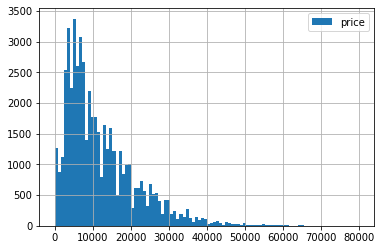

In [47]:
df.price.hist(bins=100, range=(0,80000), legend=True)
plt.show ()


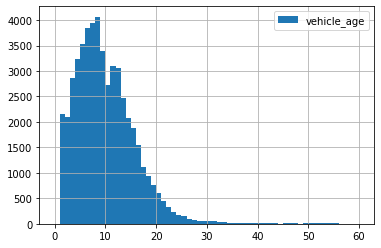

In [48]:
df.vehicle_age.hist(bins=60, range=(0,60), legend=True)
plt.show ()

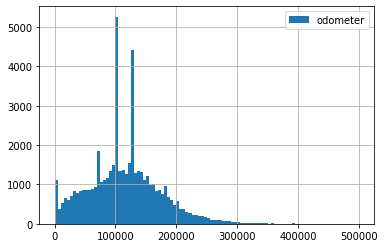

In [49]:
df.odometer.hist(bins=100, range=(0,500000), legend=True)
plt.show ()


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
In order not to show auxiliary python outputs like "<AxesSubplot:>', you can add a semicolon or plt.show () at the end of the line.
    
Adding axes to your graphs is important for providing context for the users so they understand what they are looking at. Together with for example legends and axis labels this is important to support unambiguous interpretation of displayed information.

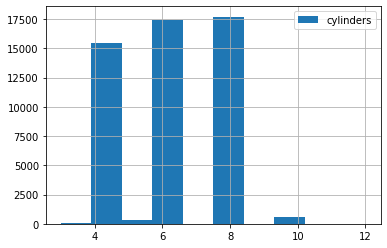

In [50]:
df.cylinders.hist(bins=10, legend=True)
plt.show ()

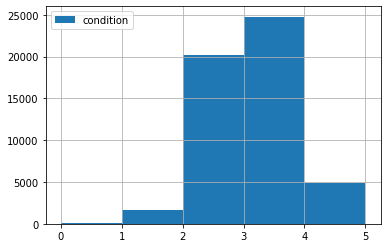

In [51]:
df.condition.hist(bins=5, legend=True)
plt.show ()

## Study and treat outliers
 I see that there are some outliers in the histograms that I would like to look into and potentially treat. Outliers can be identified by defining the lower/upper limits for normal range of values. I will use these limits to treat the outliers.

,price,model_year,condition,cylinders,odometer,days_listed,id,vehicle_age,avg_yearly_mileage
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.00000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793557,2.637535,6.121067,115199.007278,39.55476,25762.000000,9.513906,15378.480570
std,10040.803015,6.099381,0.712447,1.657457,60484.868232,28.20427,14874.130647,6.112976,11808.751864
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.00000,0.000000,1.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,75668.000000,19.00000,12881.000000,5.000000,9363.636364
50%,9000.000000,2011.000000,3.000000,6.000000,110908.000000,33.00000,25762.000000,9.000000,13036.181818
75%,16839.000000,2014.000000,3.000000,8.000000,147821.000000,53.00000,38643.000000,13.000000,18222.222222
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.00000,51524.000000,111.000000,373200.000000


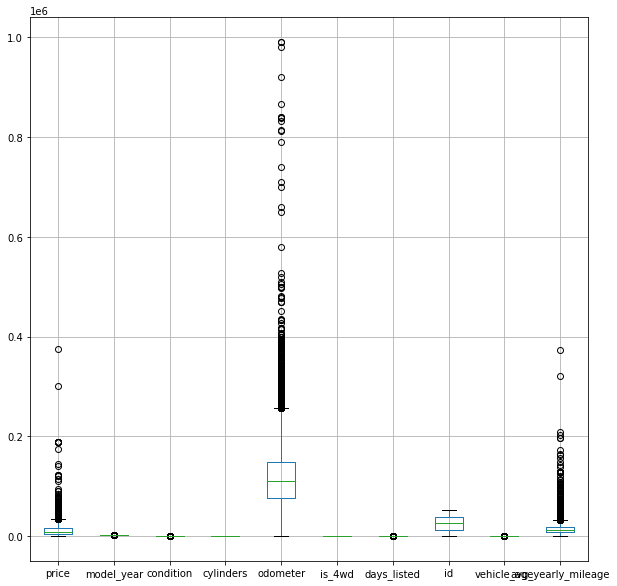

In [52]:
df.boxplot(figsize=(10,10))
df.describe()


I will resolve outliers in price, odometer and avg_yearly_mileage

In [53]:
df['is_4wd']=df['is_4wd'].astype('int')

In [54]:

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)


price                 11839.000000
model_year                7.000000
condition                 1.000000
cylinders                 4.000000
odometer              72153.000000
is_4wd                    1.000000
days_listed              34.000000
id                    25762.000000
vehicle_age               8.000000
avg_yearly_mileage     8858.585859
dtype: float64


              price    model_year     condition     cylinders       odometer  \
count  49879.000000  51525.000000  51525.000000  51525.000000   50602.000000   
mean   11095.558472   2009.793557      2.637535      6.121067  111701.171120   
std     7806.520888      6.099381      0.712447      1.657457   53977.810802   
min        1.000000   1908.000000      0.000000      3.000000       0.000000   
25%     4995.000000   2007.000000      2.000000      4.000000   74502.000000   
50%     8990.000000   2011.000000      3.000000      6.000000  109012.500000   
75%    15900.000000   2014.000000      3.000000      8.000000  144554.000000   
max    34595.000000   2019.000000      5.000000     12.000000  256000.000000   

             is_4wd  days_listed            id   vehicle_age  \
count  51525.000000  51525.00000  51525.000000  50788.000000   
mean       0.496303     39.55476  25762.000000      9.142199   
std        0.499991     28.20427  14874.130647      5.163229   
min        0.000000    

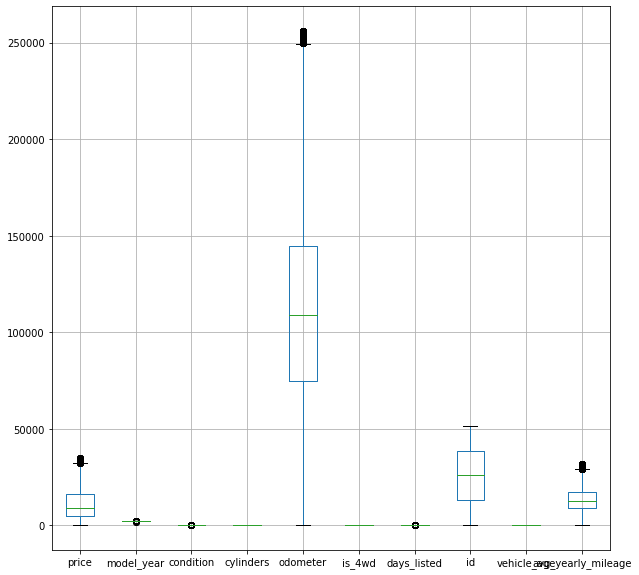

In [55]:

def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df['odometer'] = remove_outlier_IQR(df.odometer)
df['price'] = remove_outlier_IQR(df.price)
df['avg_yearly_mileage'] = remove_outlier_IQR(df.avg_yearly_mileage)
df['vehicle_age'] = remove_outlier_IQR(df.vehicle_age)

print(df.describe())
df.boxplot(figsize=(10,10))
plt.show ()



these boxplots look much better but I need to look closer at each one to see for sure. Odometer is really throwing off my scale.

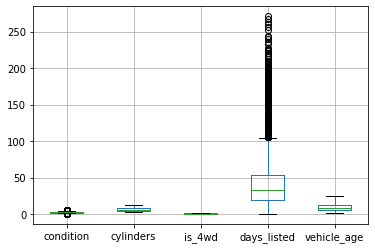

In [56]:

df.boxplot(column= ['condition','cylinders','is_4wd','days_listed','vehicle_age'])
plt.show ()

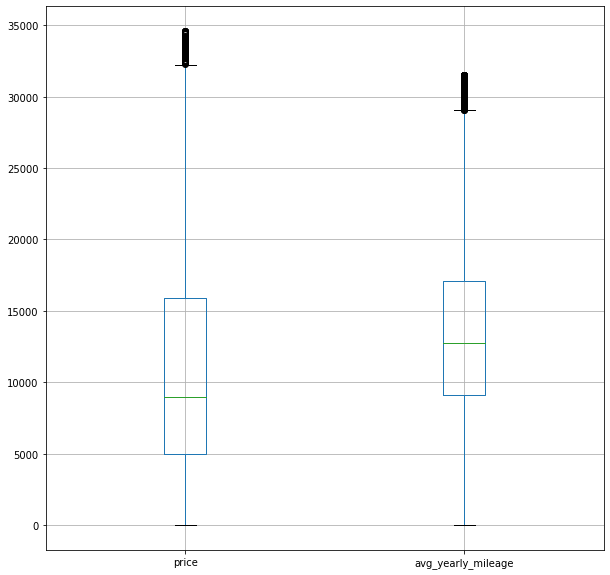

In [57]:
df.boxplot(column=['price','avg_yearly_mileage'],figsize=(10,10))
plt.show ()

In [58]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               49879 non-null  float64       
 1   model_year          51525 non-null  int64         
 2   model               51525 non-null  object        
 3   condition           51525 non-null  int64         
 4   cylinders           51525 non-null  int64         
 5   fuel                51525 non-null  object        
 6   odometer            50602 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         51525 non-null  object        
 10  is_4wd              51525 non-null  int64         
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  id                  51525 non-null  int64     

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! You perfectly identified and handled outliers. You can additionally check a nice article about working with outliers:
- https://www.pluralsight.com/guides/cleaning-up-data-from-outliers
</div>

## Study core parameters without outliers

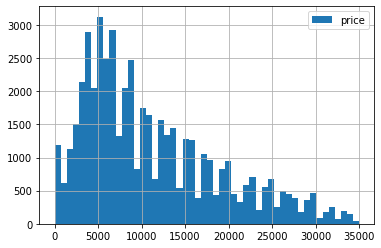

In [59]:
df.price.hist(bins=50, range=(0,35000), legend=True)
plt.show ()

This graph is much easier to see. The data has a positive skew. 

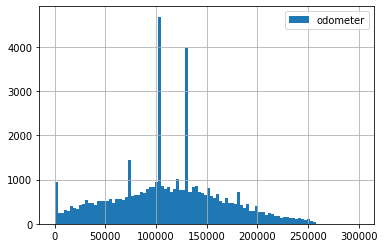

In [60]:
df.odometer.hist(bins=100, range=(0,300000), legend=True)
plt.show ()

this graph is cleaner and we can see there is a distribution that is close to normal 

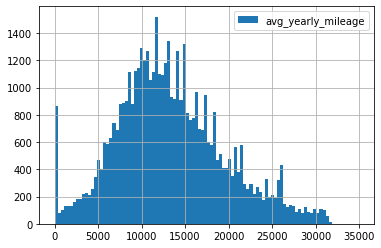

In [61]:
df.avg_yearly_mileage.hist(bins=100, range=(0,35000), legend=True)
plt.show ()

we can see that this distribution is close to normal as well but skewed right. 


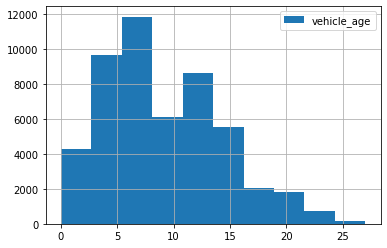

In [62]:
df.vehicle_age.hist(bins=10, range=(0,27), legend=True)
plt.show ()

in summary: we can see that most ads are priced at less than 10k, have >100000 miles on the vehicle, are in good to excellent condition, and are less than 15 years old.

## Ads lifetime

I will now study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [63]:

print(df['days_listed'].mean())
print(df['days_listed'].median())


39.55475982532751
33.0


On average an ad will be placed for 39 days before it is removed. 

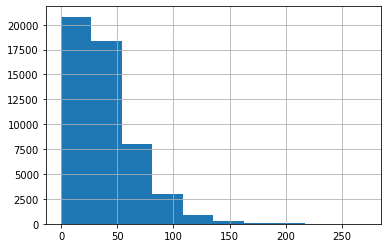

In [64]:
df.days_listed.hist()
plt.show ()

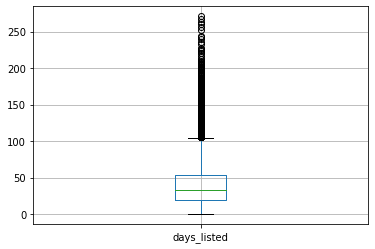

In [65]:
df.boxplot(column=['days_listed'])
plt.show ()

In [66]:
Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)
print(Q1,',',Q3)

19.0 , 53.0


In [67]:
df.query('days_listed < 2').sort_values(by='price', ascending=False).head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id,vehicle_age,avg_yearly_mileage
11690,32995.0,2017,toyota tacoma,4,6,gas,35721.0,automatic,truck,orange,1,2018-09-30,1,11690,2.0,17860.500000
48491,32041.0,2013,gmc sierra 2500hd,3,8,diesel,116884.0,automatic,truck,grey,1,2019-01-12,1,48491,7.0,16697.714286
29164,30000.0,2010,toyota tacoma,4,6,gas,72982.0,automatic,truck,red,1,2018-07-16,1,29164,9.0,8109.111111
19070,29999.0,2011,ford econoline,4,10,gas,117000.0,automatic,van,white,0,2018-08-07,0,19070,8.0,14625.000000
23315,29999.0,2011,ford econoline,4,10,gas,117000.0,automatic,van,unknown,0,2019-01-24,1,23315,9.0,13000.000000
26728,29900.0,2014,ram 2500,2,6,diesel,94323.0,automatic,truck,blue,1,2019-01-11,1,26728,6.0,15720.500000
1763,29702.0,2015,chevrolet silverado 1500,3,8,gas,78109.0,automatic,truck,unknown,1,2018-09-12,1,1763,4.0,19527.250000
23001,28997.0,2018,chevrolet silverado,4,8,gas,30107.0,automatic,truck,white,1,2019-03-22,1,23001,2.0,15053.500000
5060,28789.0,2016,ford f-150,3,6,gas,104230.0,automatic,pickup,black,1,2018-12-08,1,5060,3.0,NaN
44083,28699.0,2013,jeep wrangler unlimited,4,6,gas,34000.0,automatic,SUV,white,1,2018-08-12,0,44083,6.0,5666.666667


In [68]:
df.query('days_listed < 2')['id'].count()


227

above are some instances when an ad was placed for less than two days.There are 227 instances where an add was placed for less than 2 days.

In [69]:
df.query('days_listed > 100').sort_values(by='price', ascending=False).head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,id,vehicle_age,avg_yearly_mileage
12795,34490.0,2011,ram 3500,3,6,diesel,96753.0,automatic,pickup,brown,1,2019-02-04,106,12795,9.0,10750.333333
6324,34200.0,2017,chevrolet silverado 1500 crew,2,8,gas,49823.0,other,pickup,unknown,1,2018-11-07,108,6324,2.0,24911.500000
35756,34000.0,2010,ram 3500,3,6,diesel,88780.0,automatic,truck,red,1,2018-10-15,154,35756,9.0,9864.444444
35716,34000.0,2016,chevrolet silverado,3,8,gas,33000.0,automatic,truck,white,1,2018-11-28,194,35716,3.0,11000.000000
8093,34000.0,2011,ram 2500,3,6,diesel,61000.0,automatic,truck,white,1,2018-12-13,143,8093,8.0,7625.000000
38071,33995.0,2019,chevrolet silverado 1500,2,8,gas,234.0,automatic,truck,unknown,1,2019-03-07,118,38071,1.0,234.000000
36717,33995.0,2017,toyota tacoma,3,6,gas,49572.0,automatic,pickup,white,1,2018-12-12,106,36717,2.0,24786.000000
23800,33995.0,2018,chevrolet silverado 1500,3,4,gas,14950.0,automatic,truck,unknown,1,2018-11-10,131,23800,1.0,14950.000000
34776,33990.0,2018,chevrolet silverado 1500,3,4,gas,10662.0,automatic,truck,red,1,2018-09-08,143,34776,1.0,10662.000000
16000,33986.0,2008,chevrolet suburban,2,8,gas,82764.0,automatic,SUV,grey,1,2018-11-06,131,16000,11.0,7524.000000


In [70]:
df.query('days_listed > 100')['id'].count()

1946

there are 1946 cases of ads being placed for over 100 days

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Typical lifetime of an ad has been correctly identified.

## Average price per each type of vehicle

Now I will analyze the number of ads and the average price for each type of vehicle.

In [71]:
df['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [72]:
model_stat = pd.pivot_table(df,index='model', values=['id','price'], aggfunc=['mean','count'])
model_stat = model_stat.drop([( 'mean',    'id'),('count', 'price')], axis=1)

print(model_stat)
model_stat.columns


                           mean count
                          price    id
model                                
acura tl            6474.500000   236
bmw x5             10254.216730   267
buick enclave      11332.855556   271
cadillac escalade  12697.256140   322
chevrolet camaro   11495.160305   414
...                         ...   ...
toyota sienna       8535.444785   329
toyota tacoma      15052.000000   827
toyota tundra      13586.597582   603
volkswagen jetta    6426.240848   519
volkswagen passat   8489.905714   350

[100 rows x 2 columns]


MultiIndex([( 'mean', 'price'),
            ('count',    'id')],
           )

In [73]:
model_stat.sort_values(by=('mean', 'price'), ascending=False)

,mean,count
,price,id
model,,
chevrolet silverado 1500 crew,28326.556777,303
ford mustang gt coupe 2d,25013.784053,301
ford f150 supercrew cab xlt,24877.960245,327
ford f-350 sd,21626.152778,295
nissan frontier crew cab sv,21549.652174,345
...,...,...
nissan versa,5249.368613,274
dodge dakota,4990.702479,242


In [74]:
model_stat.sort_values(by=('count',    'id'), ascending=False)

,mean,count
,price,id
model,,
ford f-150,12984.815838,2796
chevrolet silverado 1500,14751.173104,2171
ram 1500,13971.075986,1750
chevrolet silverado,12916.960429,1271
jeep wrangler,14277.662983,1119
...,...,...
ford f-250 super duty,13870.653266,241
kia sorento,9969.754237,236


In [75]:
first = model_stat.query('model == "ford f-150"')
second = model_stat.query('model == "chevrolet silverado 1500"')
print(first)
print(second)

                    mean count
                   price    id
model                         
ford f-150  12984.815838  2796
                                  mean count
                                 price    id
model                                       
chevrolet silverado 1500  14751.173104  2171


In [76]:
top_10=model_stat.sort_values(by=('count',    'id'),ascending=False).head(10)
print(top_10)
bottom_10=model_stat.sort_values(by=('count',    'id'),ascending=False).tail(10)

                                    mean count
                                   price    id
model                                         
ford f-150                  12984.815838  2796
chevrolet silverado 1500    14751.173104  2171
ram 1500                    13971.075986  1750
chevrolet silverado         12916.960429  1271
jeep wrangler               14277.662983  1119
ram 2500                    17894.743213  1091
toyota camry                 6890.827273   990
honda accord                 6379.365145   964
chevrolet silverado 2500hd  16143.721438   915
gmc sierra 1500             14740.064890   906


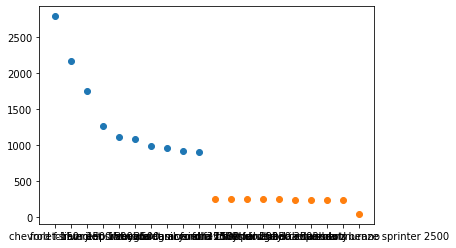

In [77]:
plt.scatter(top_10.index, top_10[('count',    'id')])
plt.scatter(bottom_10.index, bottom_10[('count',    'id')])
plt.show ()

plotted in blue are the top ten most advertized vehicles. Plotted in orange are the ten least advertized vehicles. We can clearly see that the number of ads is dependant on the model type. 

## Price factors

In this stage I will analyse which factors impact price the most, using the two most advertized vehicles I identified in the previous section. 

In [78]:
df_first=df.query('model=="ford f-150"')
df_second=df.query('model=="chevrolet silverado 1500"')
df_first.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2796 entries, 1 to 51487
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               2715 non-null   float64       
 1   model_year          2796 non-null   int64         
 2   model               2796 non-null   object        
 3   condition           2796 non-null   int64         
 4   cylinders           2796 non-null   int64         
 5   fuel                2796 non-null   object        
 6   odometer            2743 non-null   float64       
 7   transmission        2796 non-null   object        
 8   type                2796 non-null   object        
 9   paint_color         2796 non-null   object        
 10  is_4wd              2796 non-null   int64         
 11  date_posted         2796 non-null   datetime64[ns]
 12  days_listed         2796 non-null   int64         
 13  id                  2796 non-null   int64      

In [79]:
df_second.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 10 to 51482
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               2097 non-null   float64       
 1   model_year          2171 non-null   int64         
 2   model               2171 non-null   object        
 3   condition           2171 non-null   int64         
 4   cylinders           2171 non-null   int64         
 5   fuel                2171 non-null   object        
 6   odometer            2136 non-null   float64       
 7   transmission        2171 non-null   object        
 8   type                2171 non-null   object        
 9   paint_color         2171 non-null   object        
 10  is_4wd              2171 non-null   int64         
 11  date_posted         2171 non-null   datetime64[ns]
 12  days_listed         2171 non-null   int64         
 13  id                  2171 non-null   int64     

In [80]:
first_corr=df_first.corr()
first_corr.style.background_gradient(cmap='PuOr_r')

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,id,vehicle_age,avg_yearly_mileage
price,1.000000,0.605469,0.383456,-0.295731,-0.480934,0.310619,-0.023691,0.018819,-0.680937,0.286042
model_year,0.605469,1.000000,0.368611,-0.221173,-0.397893,0.249522,-0.018522,-0.010322,-0.996297,0.530157
condition,0.383456,0.368611,1.000000,-0.063792,-0.362357,0.105882,-0.013303,0.007833,-0.404997,0.079816
cylinders,-0.295731,-0.221173,-0.063792,1.000000,0.156020,0.053575,-0.001314,0.026878,0.259054,-0.150581
odometer,-0.480934,-0.397893,-0.362357,0.156020,1.000000,-0.088192,0.043735,0.038323,0.503449,0.292055
is_4wd,0.310619,0.249522,0.105882,0.053575,-0.088192,1.000000,-0.020348,0.029969,-0.241164,0.156072
days_listed,-0.023691,-0.018522,-0.013303,-0.001314,0.043735,-0.020348,1.000000,0.028869,0.042391,0.025096
id,0.018819,-0.010322,0.007833,0.026878,0.038323,0.029969,0.028869,1.000000,0.010534,0.035459
vehicle_age,-0.680937,-0.996297,-0.404997,0.259054,0.503449,-0.241164,0.042391,0.010534,1.000000,-0.522333
avg_yearly_mileage,0.286042,0.530157,0.079816,-0.150581,0.292055,0.156072,0.025096,0.035459,-0.522333,1.000000


In [81]:
second_corr=df_second.corr()
second_corr.style.background_gradient(cmap='PuOr_r')

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,id,vehicle_age,avg_yearly_mileage
price,1.000000,0.738732,0.353720,0.060511,-0.628730,0.266013,-0.010990,-0.034547,-0.749547,0.183836
model_year,0.738732,1.000000,0.337394,-0.070339,-0.560566,0.160291,-0.019838,-0.037266,-0.995650,0.430357
condition,0.353720,0.337394,1.000000,0.010133,-0.362396,0.092146,-0.024882,-0.019140,-0.330220,-0.062486
cylinders,0.060511,-0.070339,0.010133,1.000000,0.072617,0.319713,-0.022383,-0.021465,0.068911,-0.004832
odometer,-0.628730,-0.560566,-0.362396,0.072617,1.000000,-0.052830,-0.025797,0.035674,0.578777,0.323098
is_4wd,0.266013,0.160291,0.092146,0.319713,-0.052830,1.000000,-0.007029,-0.006508,-0.148525,0.097291
days_listed,-0.010990,-0.019838,-0.024882,-0.022383,-0.025797,-0.007029,1.000000,0.027078,-0.002538,-0.049156
id,-0.034547,-0.037266,-0.019140,-0.021465,0.035674,-0.006508,0.027078,1.000000,0.043638,-0.011099
vehicle_age,-0.749547,-0.995650,-0.330220,0.068911,0.578777,-0.148525,-0.002538,0.043638,1.000000,-0.424992
avg_yearly_mileage,0.183836,0.430357,-0.062486,-0.004832,0.323098,0.097291,-0.049156,-0.011099,-0.424992,1.000000


These correlation plots show that 'model_year' is strongly, positively correlated with price. I can also see that condition and 4wd are also positivly correlated. The strongest negative correlation is with vehicle_age: as vehicle age goes down, the price of the vehicle will go up. Likewise with the mileage on the car. I can use the id column as a control here, which is helpful. 

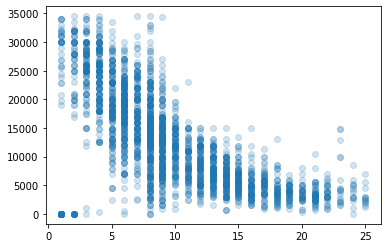

In [82]:
#df_first.vehicle_age.hist(='price',bins=25)
plt.scatter(df_first['vehicle_age'], df_first['price'], alpha=0.2)
plt.show ()

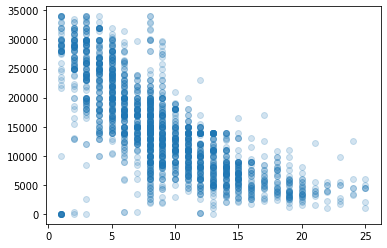

In [83]:
plt.scatter(df_second['vehicle_age'], df_second['price'], alpha=0.2)
plt.show ()

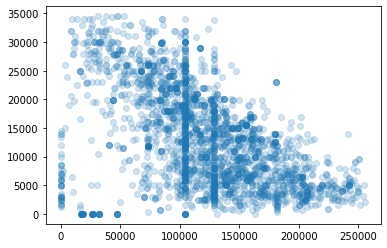

In [84]:
plt.scatter(df_first['odometer'], df_first['price'], alpha=0.2)
plt.show ()

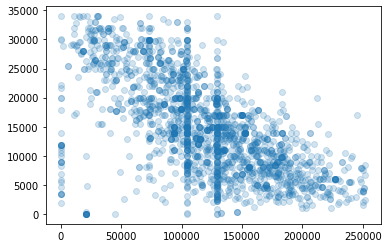

In [85]:
plt.scatter(df_second['odometer'], df_second['price'], alpha=0.2)
plt.show ()

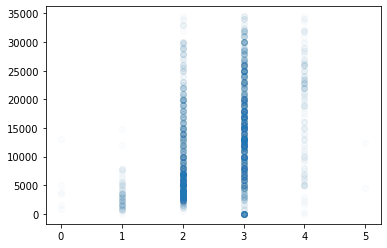

In [86]:
plt.scatter(df_first['condition'], df_first['price'], alpha=0.02)
plt.show ()

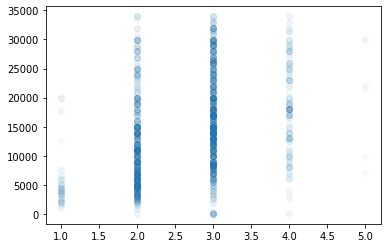

In [87]:
plt.scatter(df_second['condition'], df_second['price'], alpha=0.03)
plt.show ()

These scatterplots are confirming what I saw in the correlation matrix.

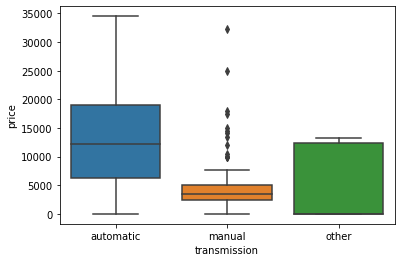

In [88]:

sns.boxplot(x = df_first['transmission'], y = df_first['price'])
plt.show ()

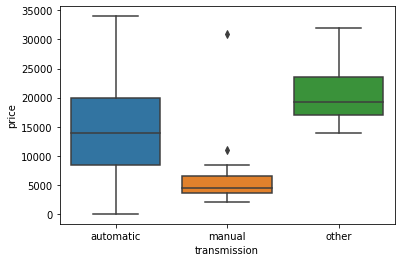

In [89]:
sns.boxplot(x = df_second['transmission'], y = df_second['price'])
plt.show ()

Transmission does seem to impact the price. 
If the car is automatic it is likely to have a higher price than its manual counterpart. 
It seems that the ' other' transmission may depend on the model

In [90]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

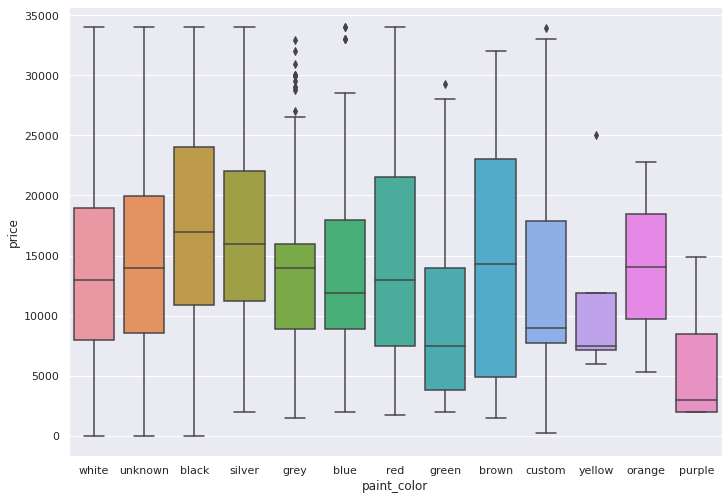

In [91]:
sns.boxplot(x = df_second['paint_color'], y = df_second['price'],order=['white','unknown','black','silver','grey','blue','red','green','brown','custom','yellow', 'orange', 'purple'
                                                                       ])
plt.show ()

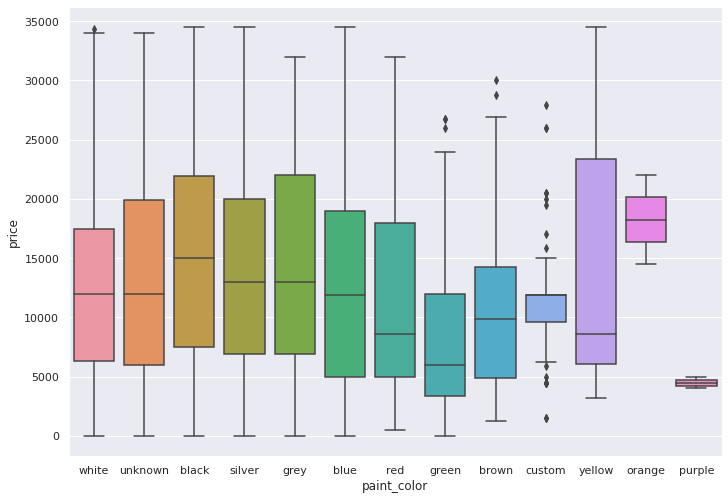

In [92]:
sns.boxplot(x = df_first['paint_color'], y = df_first['price'],order=['white','unknown','black','silver','grey','blue','red','green','brown','custom','yellow', 'orange', 'purple'])
plt.show ()

based on the 'unknown' color I would say that the only correlation that is evident is that the more excentric the color the lower the price. The more generic the color the higher the price. But this is a weak correlation. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Overall an excellent data analysis with correct conclusions and different graph types.

Great that you managed to check correlation and created a scatter plot for different features and a heatmap based on this data.

</div>

## General conclusion

Through my rigirous analysis, I have found that the most influencial factors on the price of vehicles are: the vehicles age, the mileage on the car, the condition of the vehicle and having automatic transmission. Something that does not appear to effect the price of the vehicle as much is the color it is painted.  I am able to make these conclusions based on the correlation matrix which was then confirmed with the scatter and box and whisker plots. I am confident in these conclusions because I was able to clean and treat the data myself and therefore get to know it very well. The decisions I made for the outliers and missing data allow me to have confidence in the quality of the data. Thank you for your time! 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Very insightful and structured overall conclusions and recommendations for the business.
</div>